The ovjective of this project is to advice the Director of a mobile phone operator to predit the churn rate of his company thanks of thde data set celldata.csv. 
It contains 8000 observations for : 
- The target variable : *churn* {0,1}
- p = 10 feature : CreditScore (quant), Geography (qual), Gendr (qual), Age(quant), Tenure(quant), balance(Quant), NumOfProducts(quant), HasCrCard(quant {0,1}), isActiveMember (quant{0,1} ), salary (quant).



**The churn rate** means : 
- 0 : the customer stayed
- 1 : the customer left the service

**The credit score**: represents a person’s creditworthiness. 

**Tenure** : time a customer has been with the company.

**Balance** :current financial standing of the customer with the company.


Avant de se lancer dans les modèles et la prédiction, il faut explorer les données et les analyser. Cette exploration ne pourrait être fiable que sur des données clean et bien structurées. 

**Etape 1** : 
*Préparation des données* : nettoyage : valeurs manquantes, dupliquées, outliers. 

**Etape 2** : 
*Exploration des données dans leur globalité* : nombre d'échantillons par classe, matrice de corrélation.  

**Etape 3** : 
*Analyse statistique* : 
- Univariée : pour chaque variable, on découvrira les statistiques descriptives : sa dispersion, sa variabilité, ses valeurs centrales, sa distribution, et sa distribution par classe de churn.
- Bivariée : on étudiera la relation entre deux variables (Xi,Xj) : i,j = 1,...,10

**Etape 4** :
Choix de modèle de prédiction : Entraînement d'un ensemble de méthodes de classification.
- Choix de modèles adaptés au problème de classification. 
- Entraînement et Test 
- Evaluation des performances par Cross Validation : accuracy_train vs accuracy_test pour chaque modèle, ROC-AUC, Precision-Recall.
- Choisir le modèle avec meilleur compromis entre performance et interprétabilité
- Optimiser les hyperparamètres : GridSearchCV ou RandomizedSearchCV pour ajuster les paramètres du modèle choisi.   

RK : privilégie des modèles robustes au déséquilibre et surveille Recall ou F1-score plutôt que la simple accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [ ]:
#Loading the dataset
df = pd.read_csv('celldata.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
0,632,Germany,Female,50,5,107959.39,1,1,1,6985,1
1,649,France,Female,42,7,0.00,2,0,1,22974,0
2,595,France,Male,29,6,150685.79,1,1,0,87771,0
3,653,Spain,Male,35,6,116662.96,2,1,1,23864,0
4,559,Spain,Female,40,7,144470.77,1,1,1,18918,0


**Etape 1** Préparation des données

In [ ]:
#Dataset exploration
df.info()

#Checking for missing values
df.isnull().sum()

# Checking for duplicates
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     8000 non-null   int64  
 1   Geography       8000 non-null   object 
 2   Gender          8000 non-null   object 
 3   Age             8000 non-null   int64  
 4   Tenure          8000 non-null   int64  
 5   Balance         8000 non-null   float64
 6   NumOfProducts   8000 non-null   int64  
 7   HasCrCard       8000 non-null   int64  
 8   IsActiveMember  8000 non-null   int64  
 9   Salary          8000 non-null   int64  
 10  Churn           8000 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 687.6+ KB


np.int64(0)

*Notre data set est bien clean sans valeurs manquantes ou dupliquées.*


**Etape 2**

In [ ]:
#Statistical summary
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,650.805000,38.871625,5.013000,76011.635494,1.533625,0.704750,0.515750,100211.396750,0.201125
std,96.721648,10.446006,2.897565,62402.105212,0.583448,0.456184,0.499783,57165.688096,0.400866
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51464.500000,0.000000
50%,652.000000,37.000000,5.000000,96846.565000,1.000000,1.000000,1.000000,100583.000000,0.000000
75%,718.000000,44.000000,7.000000,127593.625000,2.000000,1.000000,1.000000,149068.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.000000,1.000000


Les utilisateurs de cet opérateur téléphonique sont des adultes d'age moyen 38 ans, 75% d'entre payent par carte et ils sont des membres actifs. En moyenne, ces utilisateurs ont une tenure de 5 ans et utilisent 1 produit de la compagnie. 

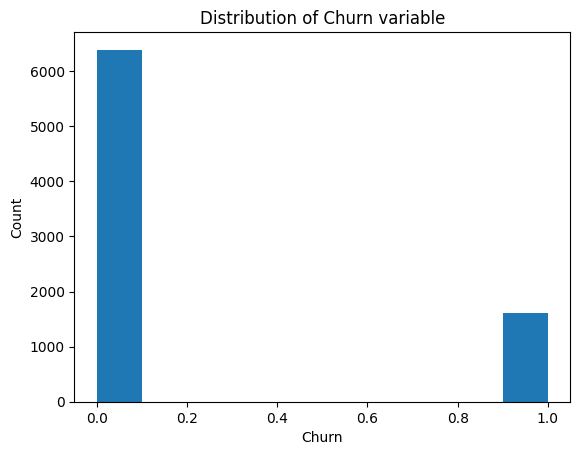

Percentage of churned customers: 20.11%


In [ ]:
col = df['Churn']
col.value_counts()
plt.hist(col)
plt.title('Distribution of Churn variable')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#percentage of churned customers
churned_percentage = (col.value_counts()[1] / len(col)) * 100
print(f'Percentage of churned customers: {churned_percentage:.2f}%')

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(columns=['Churn'])
df_numeric.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary
0,632,50,5,107959.39,1,1,1,6985
1,649,42,7,0.00,2,0,1,22974
2,595,29,6,150685.79,1,1,0,87771
3,653,35,6,116662.96,2,1,1,23864
4,559,40,7,144470.77,1,1,1,18918


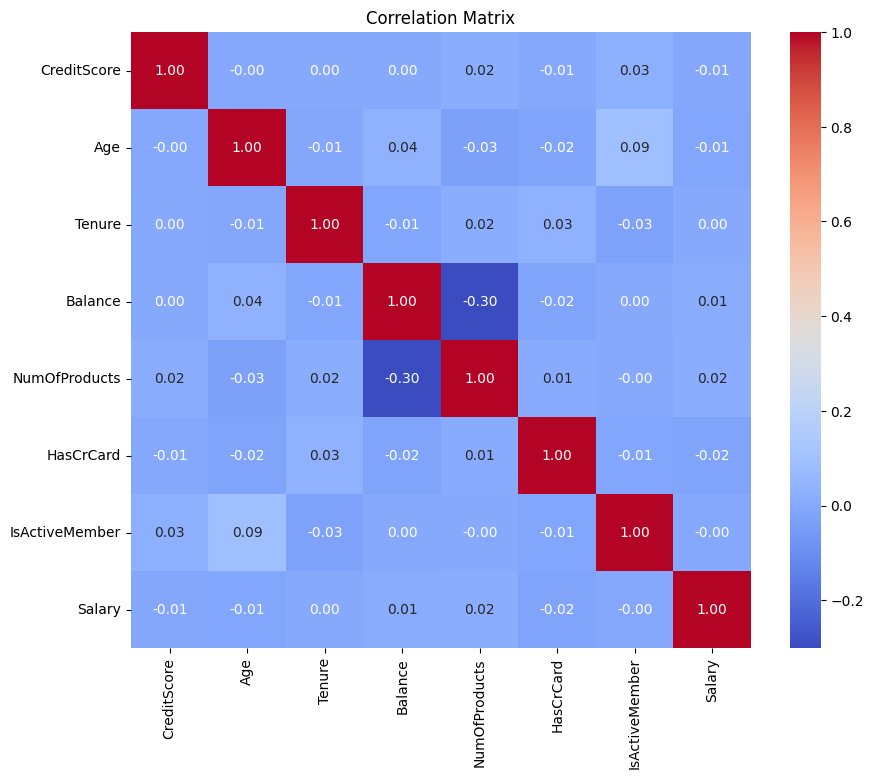

In [256]:
# Correlation matrix 
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Généralement, on remarque qu'il n'y a pas de corrélation entre les features. En revanche, cette corélation modérement négative (-0.3) montre qu'il y a ue relation linaière inverse entre le balance de l'utilisateur et son nombre de produits. Les clients ayant des balances élevées ont tendance d'avoir moins de produits.

**Etape 3**

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     8000 non-null   int64  
 1   Geography       8000 non-null   object 
 2   Gender          8000 non-null   object 
 3   Age             8000 non-null   int64  
 4   Tenure          8000 non-null   int64  
 5   Balance         8000 non-null   float64
 6   NumOfProducts   8000 non-null   int64  
 7   HasCrCard       8000 non-null   int64  
 8   IsActiveMember  8000 non-null   int64  
 9   Salary          8000 non-null   int64  
 10  Churn           8000 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 687.6+ KB


*Analyse Statistique Univariée*

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


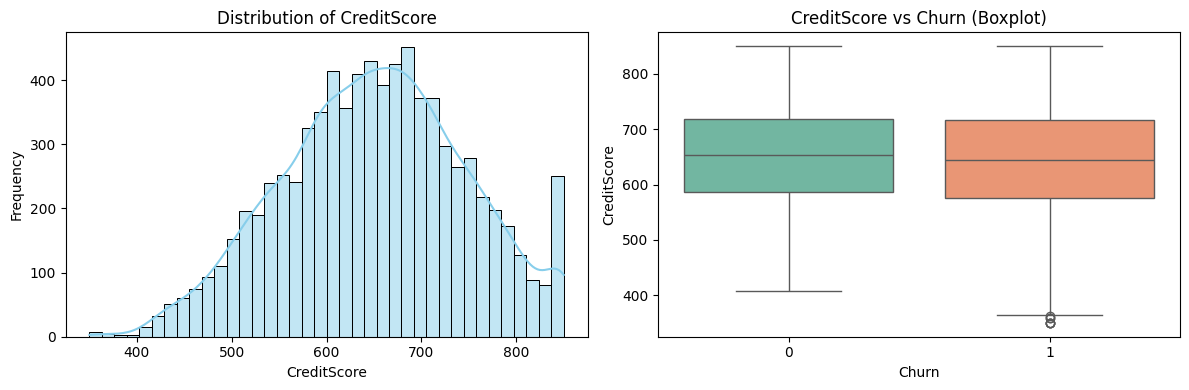

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


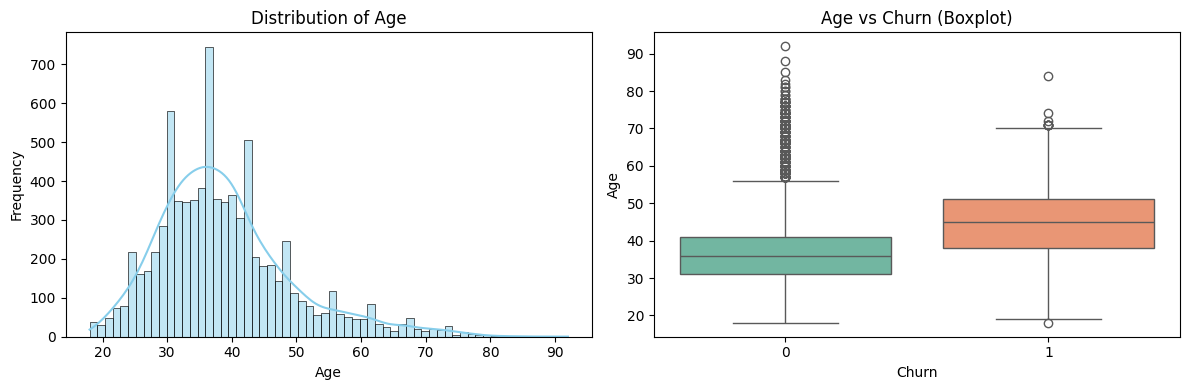

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


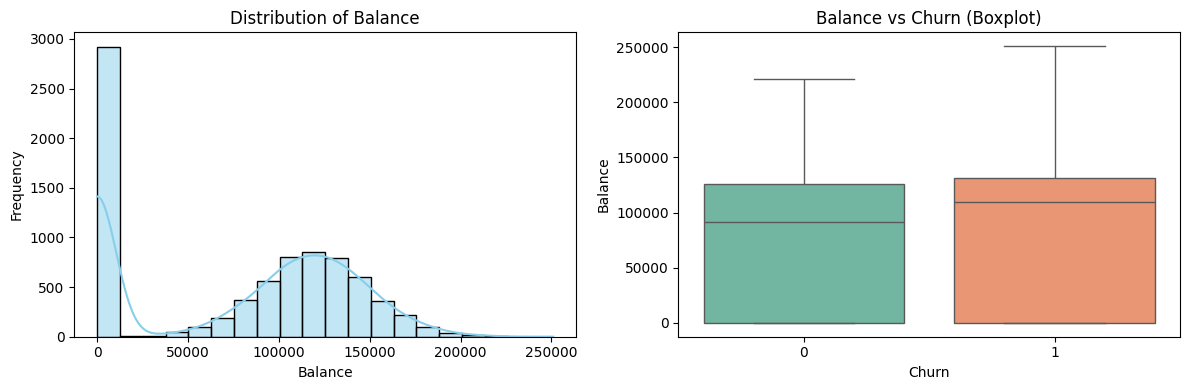

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


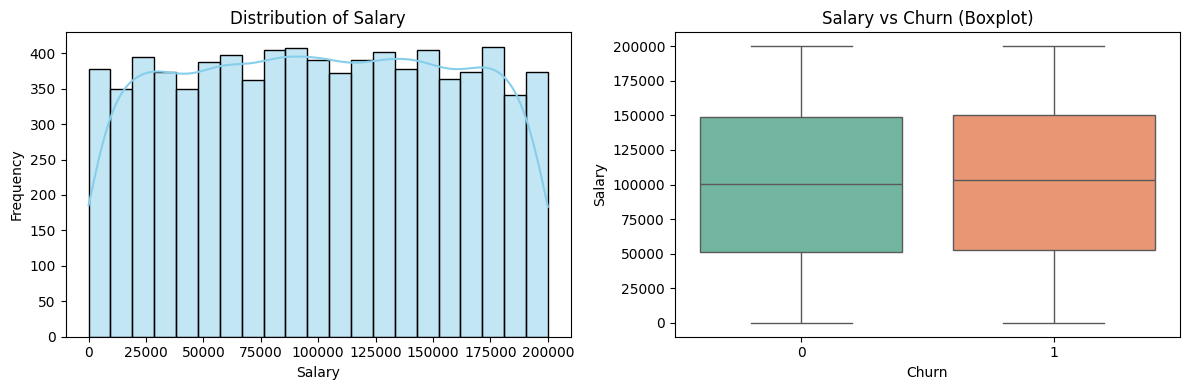

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = ['CreditScore', 'Age', 'Balance', 'Salary']

for col in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogramme avec une couleur
    sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Scatterplot avec une autre couleur
    sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")
    axes[1].set_title(f'{col} vs Churn (Boxplot)')
    #axes[1].set_title(f'{col} vs Churn')
    axes[1].set_ylabel(col)
    axes[1].set_xlabel('Churn')

    plt.tight_layout()
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_9164\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


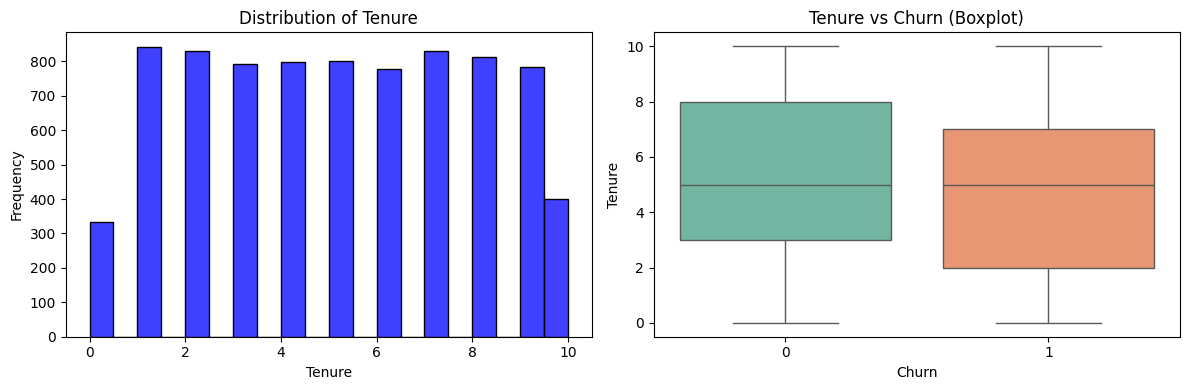

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


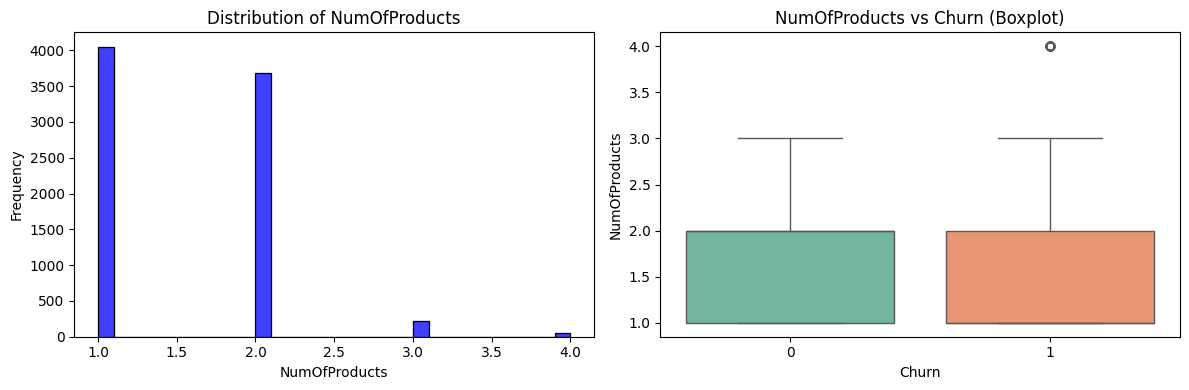

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


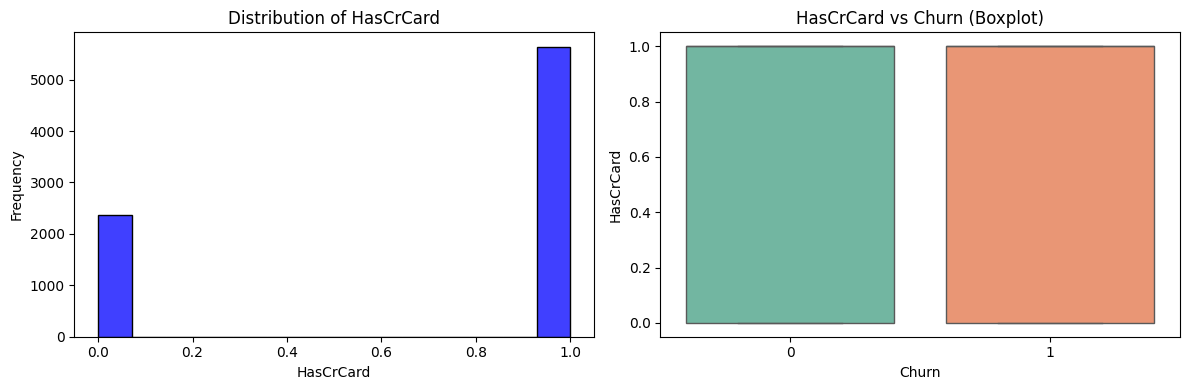

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


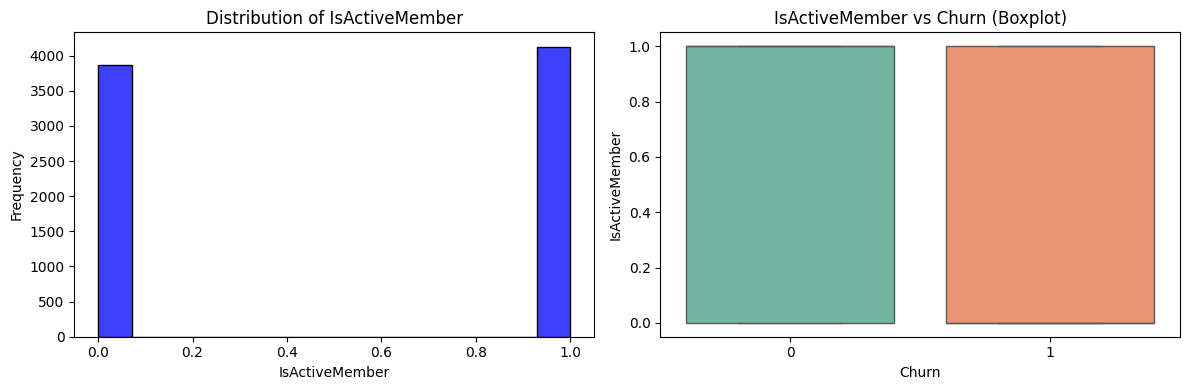

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


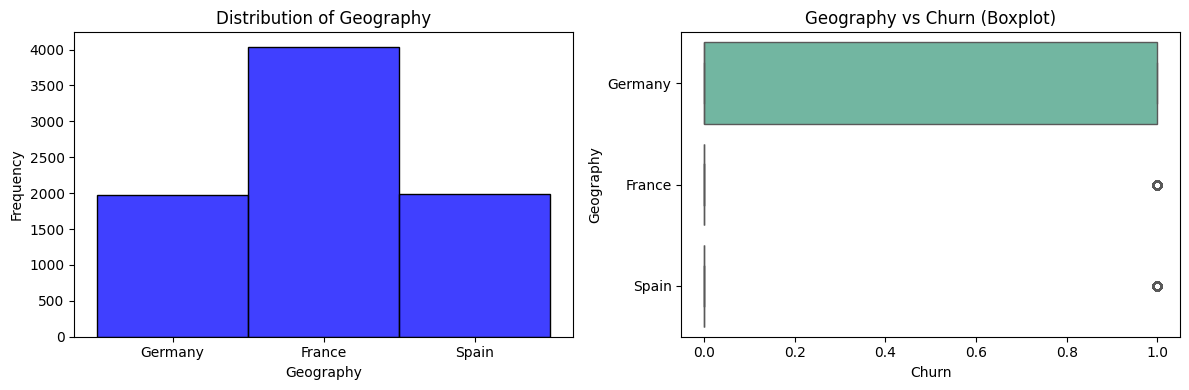

In [259]:
## Distribution des variables catégorielles
cat_columns =['Tenure', 'NumOfProducts', 'HasCrCard',  'IsActiveMember', 'Geography']
for col in cat_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogramme avec une couleur
    sns.histplot(df[col], kde=False, ax=axes[0], color="blue")
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Scatterplot avec une autre couleur
    sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")
    axes[1].set_title(f'{col} vs Churn (Boxplot)')
    #axes[1].set_title(f'{col} vs Churn')
    axes[1].set_ylabel(col)
    axes[1].set_xlabel('Churn')

    plt.tight_layout()
    plt.show()
    
    


*Analyse Statistique Bivariée*

In [260]:
## Identification des types de variables

df.columns
# Liste des variables quantitatives 
num_columns =[]
#Liste des variables qualitatives
cat_columns =[]

for col in df.columns:
    if df[col].dtype in ['float64','int64'] :
        num_columns.append(col)
    else:
        cat_columns.append(col)

print("Categorical Columns:", cat_columns)

# Liste des variables quantitatives {0,1}
binary_columns = []
for col in num_columns:
    if df[col].nunique() == 2:
        binary_columns.append(col)
print('binary_columns:', binary_columns)

numeric_columns = [col for col in num_columns if col not in binary_columns]
print('numeric_columns:', numeric_columns)

Categorical Columns: ['Geography', 'Gender']
binary_columns: ['HasCrCard', 'IsActiveMember', 'Churn']
numeric_columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Salary']


C:\Users\hp\AppData\Local\Temp\ipykernel_9164\3435255871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Churn'] = df ['Churn']


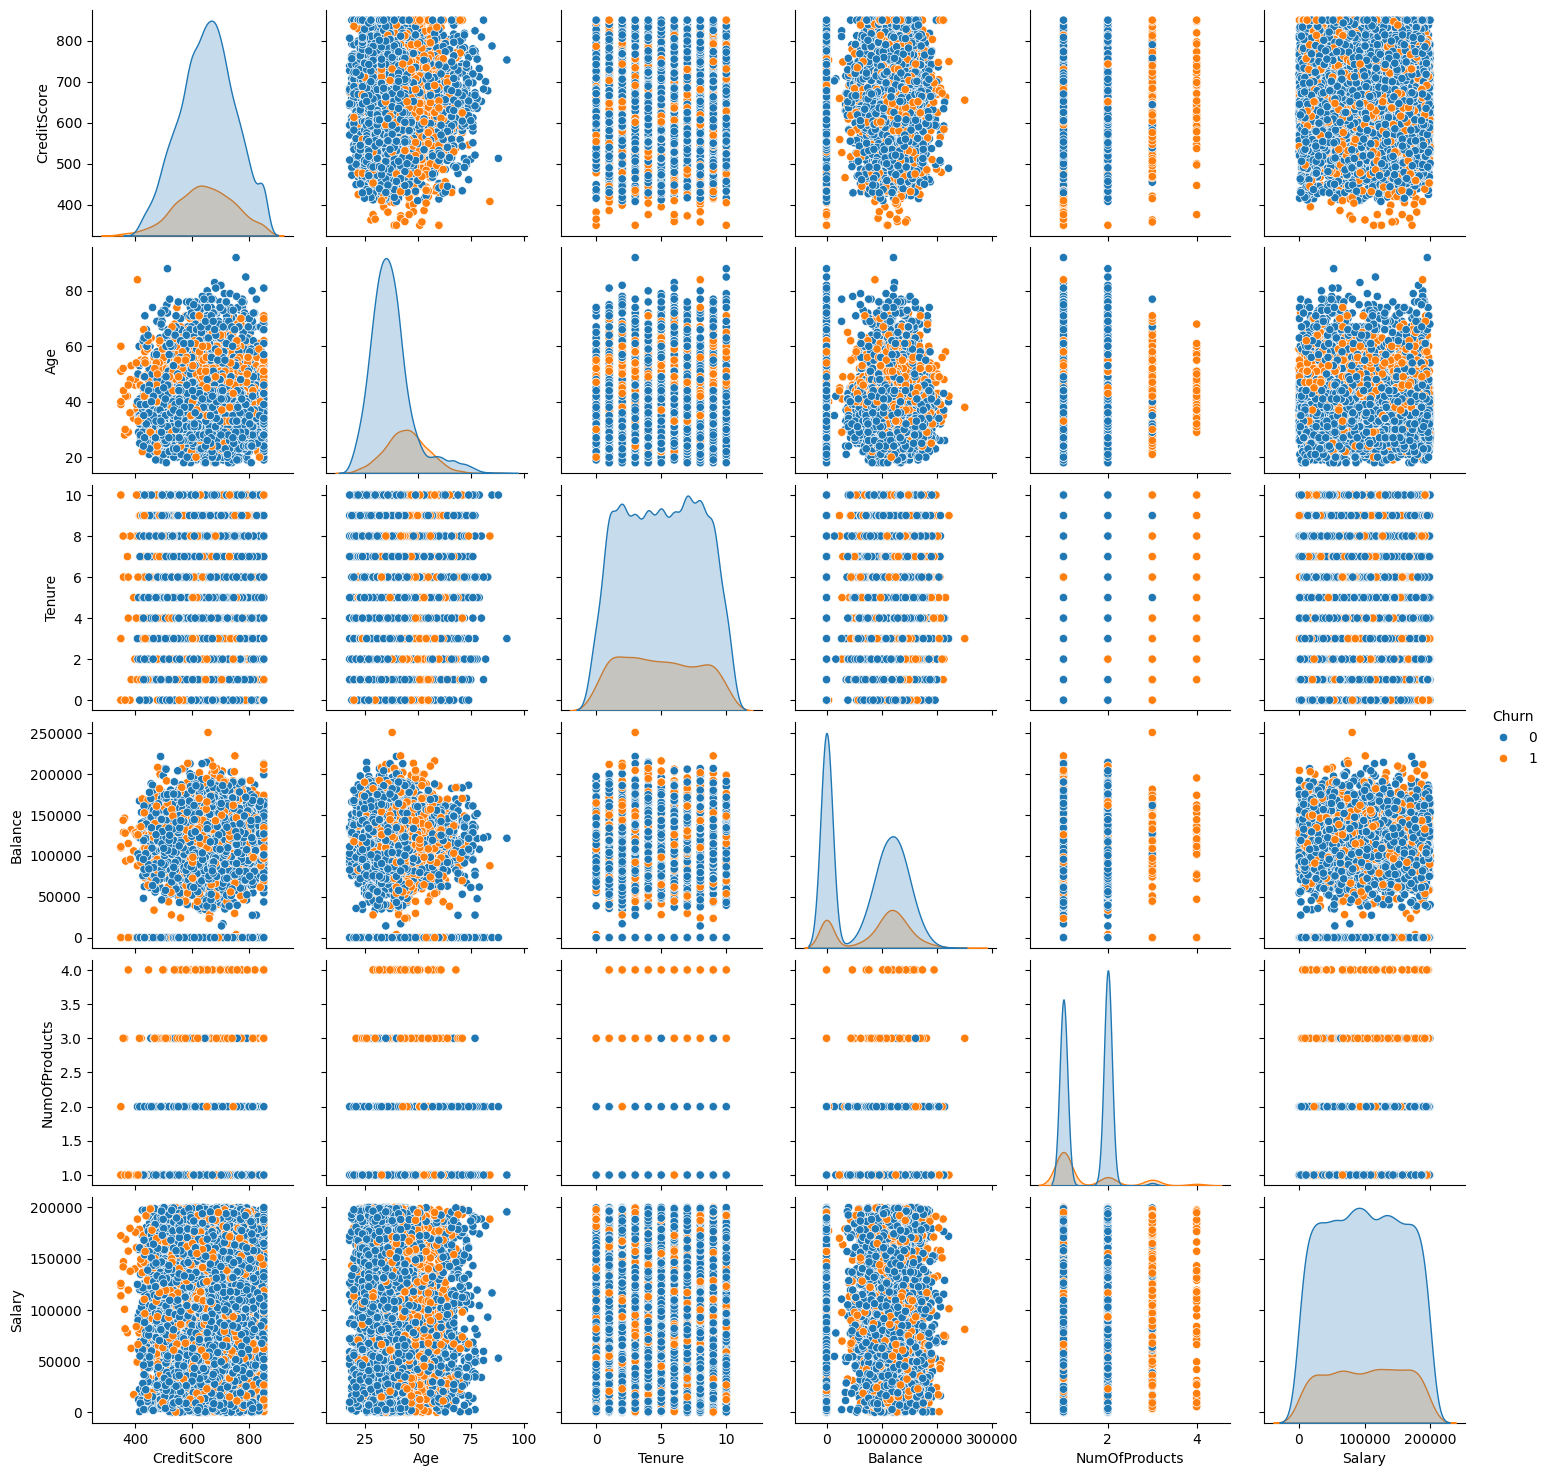

In [261]:
#Numeric vs numeric
df_numeric = df[numeric_columns]
df_numeric['Churn'] = df ['Churn']
df_numeric.head()

# Paiplot Matrix 
sns.pairplot(df_numeric, hue = 'Churn' ,vars = numeric_columns)


C:\Users\hp\AppData\Local\Temp\ipykernel_9164\4060161192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualit['Churn'] = df ['Churn']


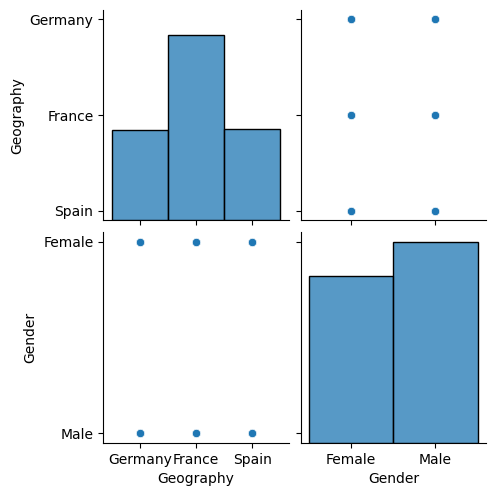

In [262]:
#Qualitative vs Qualitative
df_qualit = df[cat_columns]
df_qualit['Churn'] = df ['Churn']
df_qualit.head()

sns.pairplot(df_qualit, vars = cat_columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_9164\1431347180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_df['Churn'] = df ['Churn']


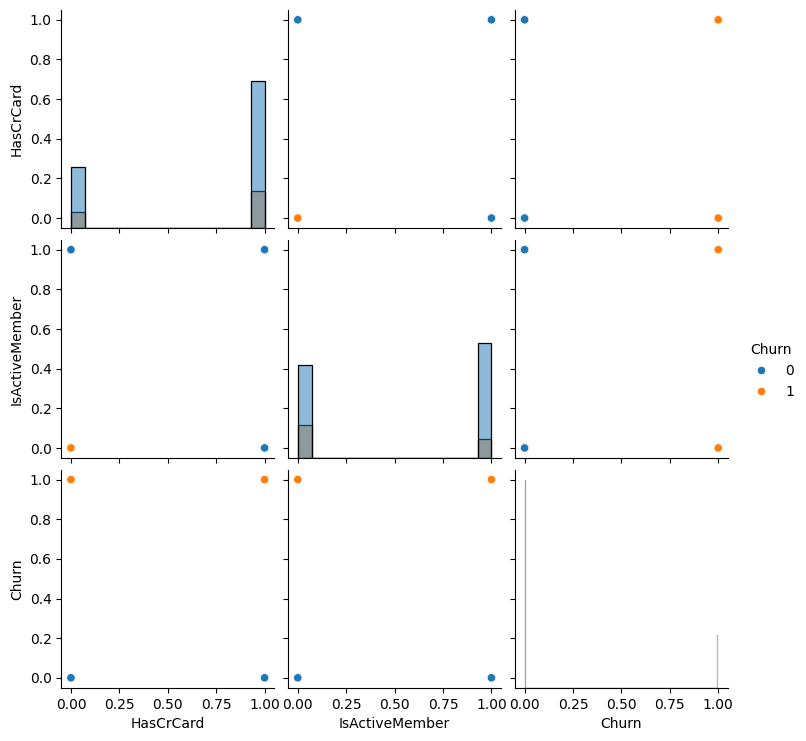

In [263]:
# binary_columns vs binary_columns
binary_df = df[binary_columns]
binary_df['Churn'] = df ['Churn']
binary_df.head()

sns.pairplot(binary_df, hue='Churn', vars = binary_columns, diag_kind='hist')

In [ ]:
# x = cat_columns , y= numeric_columns
sns.pairplot(df, x_vars=cat_columns, y_vars=numeric_columns, hue='Churn', diag_kind='hist')


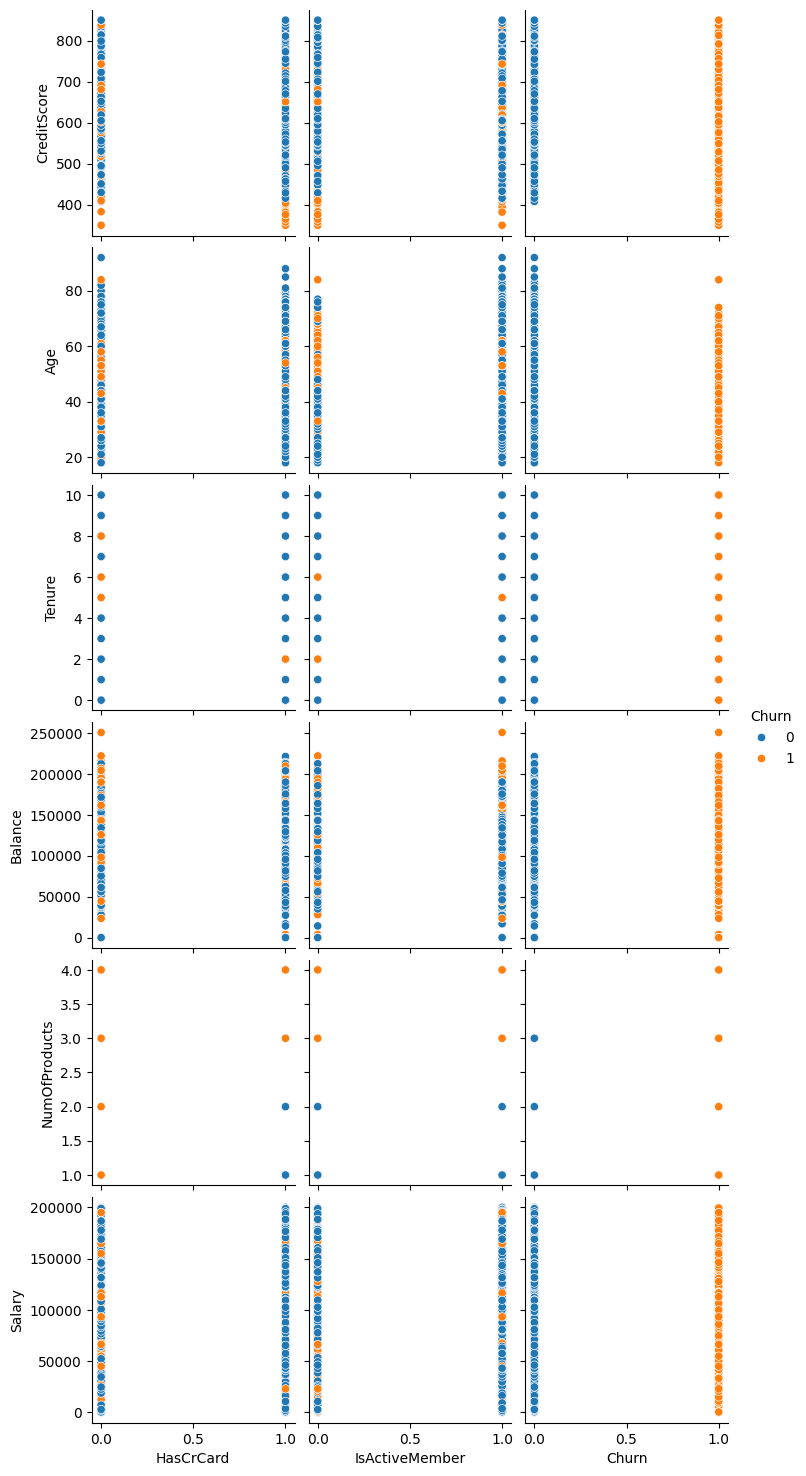

In [ ]:
# numeric vs binary
sns.pairplot(df, x_vars=binary_columns, y_vars=numeric_columns, hue='Churn', diag_kind='hist')

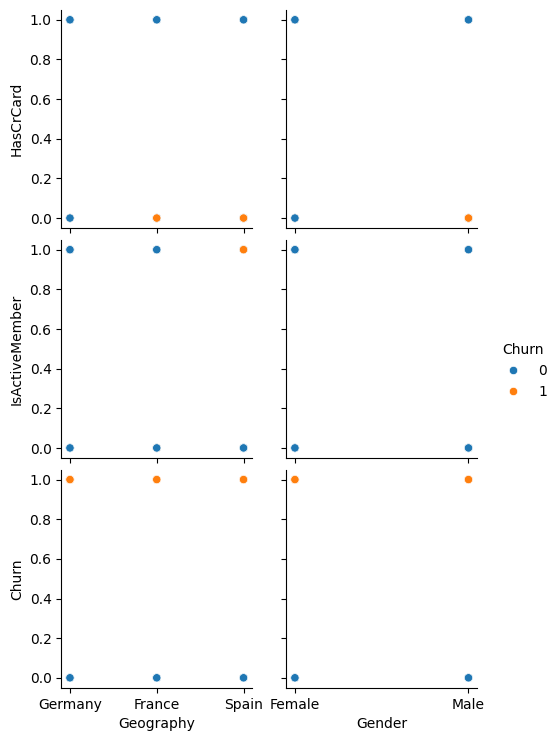

In [ ]:
# Qualit vs binary
sns.pairplot(df, x_vars=cat_columns, y_vars=binary_columns, hue='Churn', diag_kind='hist')

A partir de ces pairplots; on peux remarquer qu'il y a pas mal de relations entre les variables de notre data set.
Maintenant l'étape suivante aura pour objectifs de détecter si jamais il y a des outliers au niveau de notre jeu de données. 

**Outliers**

In [ ]:
from sklearn.ensemble import IsolationForest

Nombre des outliers detectés: 400
Pourcentage des outliers detectés: 5.00%


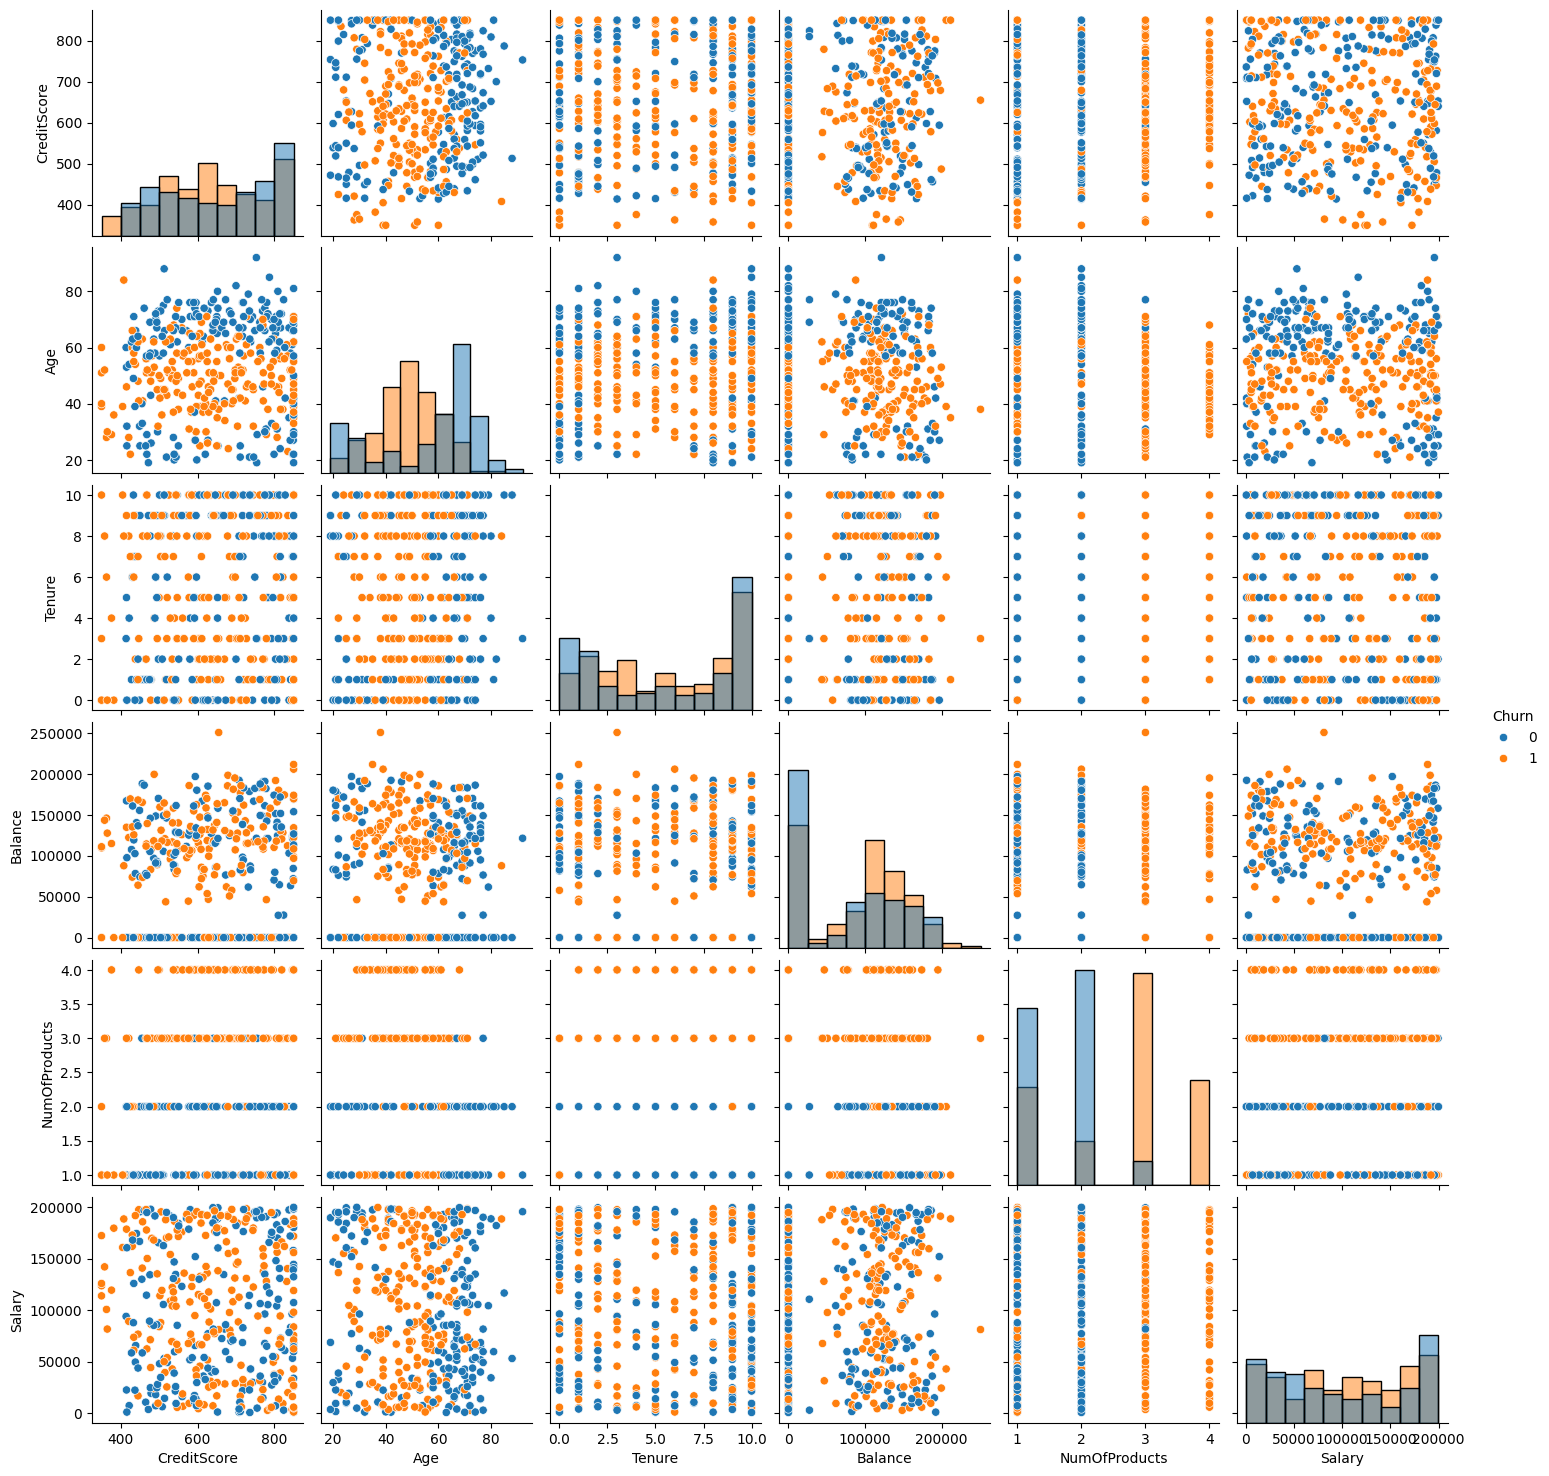

In [ ]:
# Detection des outliers dans les variables numeriques

iso = IsolationForest(contamination=0.05)  # 5% de données aberrantes
yhat = iso.fit_predict(df[numeric_columns])
outliers_iso = df[yhat == -1]
outliers_percentage_iso = (len(outliers_iso) / len(df)) * 100
print(f'Nombre des outliers detectés: {len(outliers_iso)}')
print(f'Pourcentage des outliers detectés: {outliers_percentage_iso:.2f}%')
outliers_iso.head()
sns.pairplot(outliers_iso, hue='Churn', vars=numeric_columns, diag_kind='hist')


In [ ]:
out_churned = len(outliers_iso[outliers_iso['Churn']==1])/len(outliers_iso) * 100
out_churned

52.5

Nombre des outliers detectés: 34
Pourcentage des outliers detectés: 0.43%


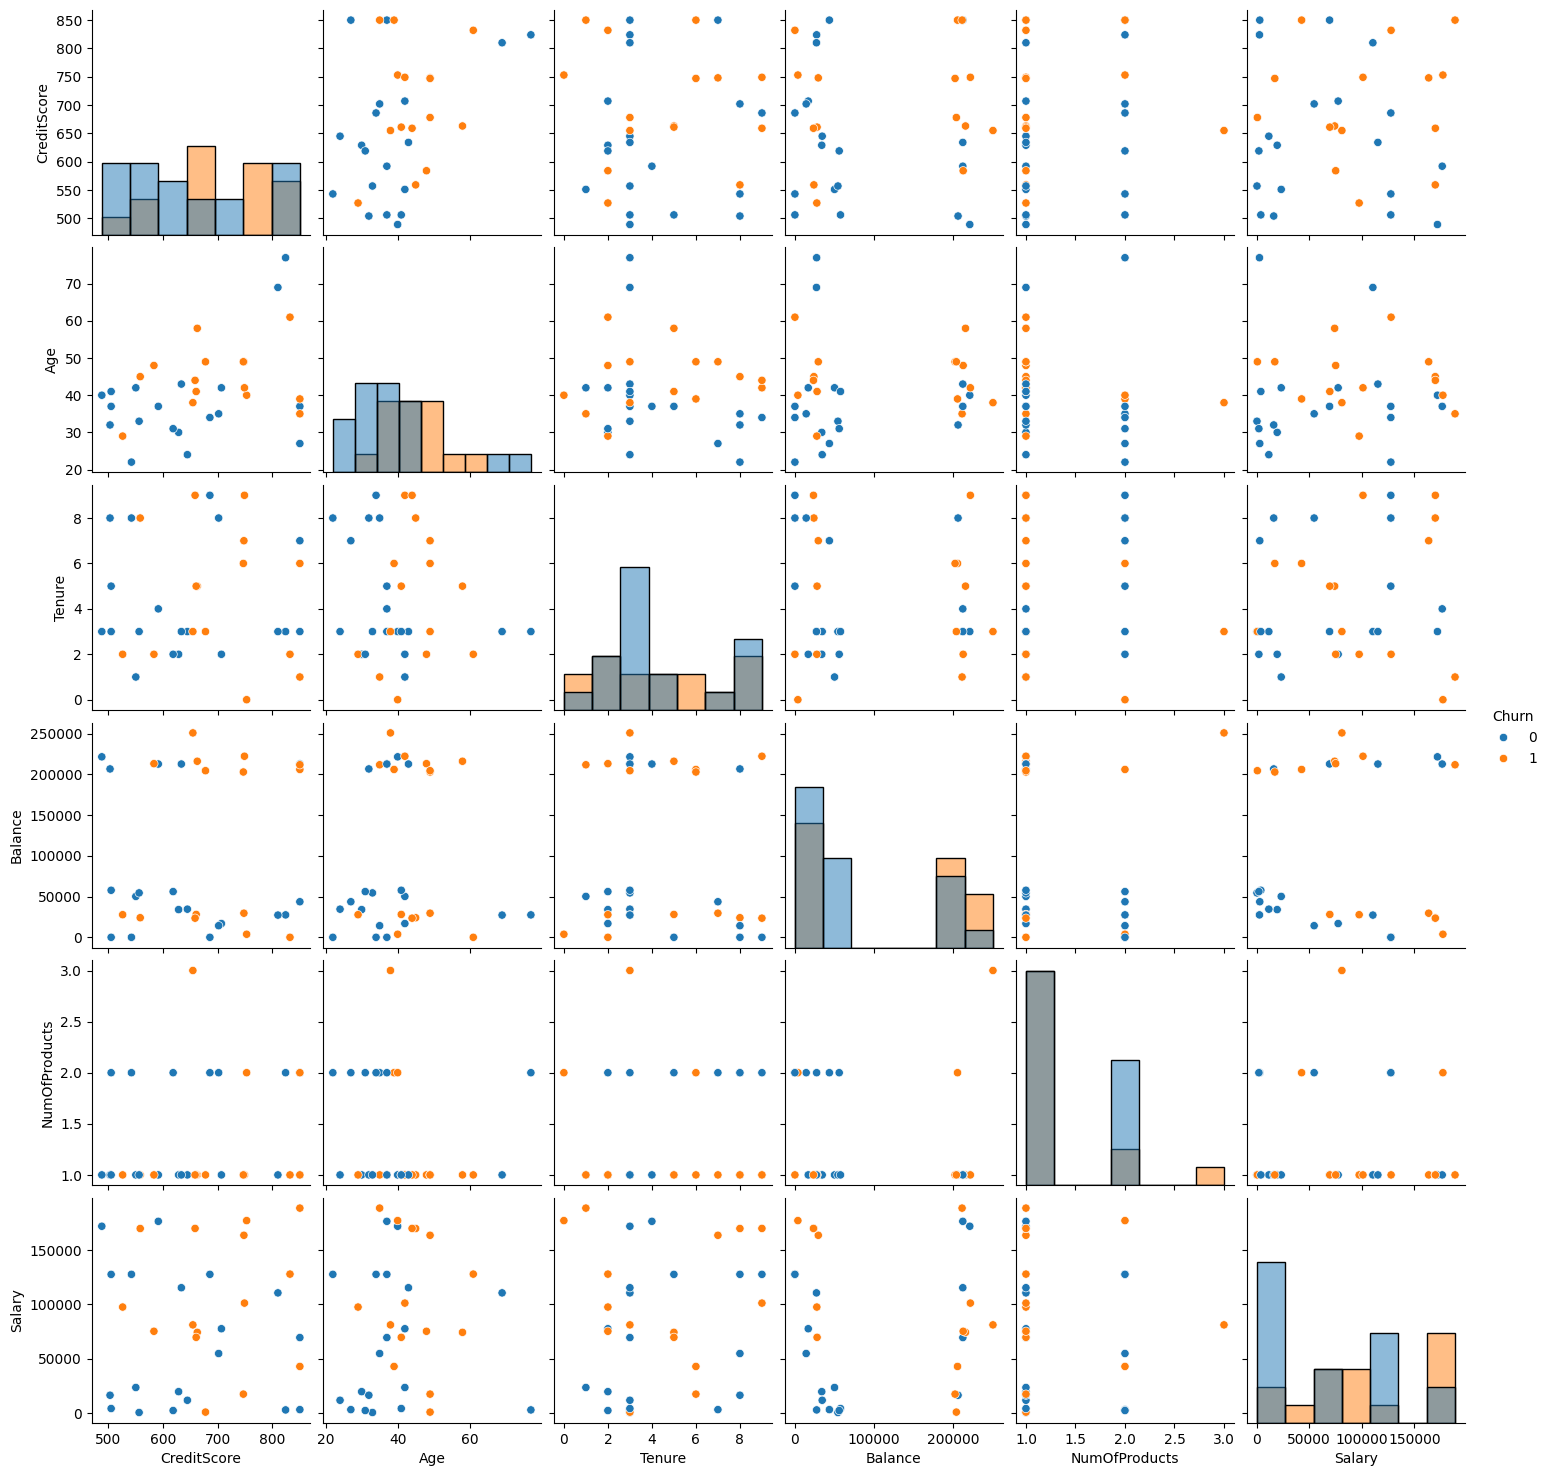

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Detection des outliers dans les variables numeriques avec LOF
lof = LocalOutlierFactor(n_neighbors=20)
yhat = lof.fit_predict(df[numeric_columns])
outliers_lof = df[yhat == -1]
outliers_percentage = (len(outliers_lof) / len(df)) * 100
print(f'Nombre des outliers detectés: {len(outliers_lof)}')
print(f'Pourcentage des outliers detectés: {outliers_percentage:.2f}%')
sns.pairplot(outliers_lof, hue='Churn', vars=numeric_columns, diag_kind='hist')

In [ ]:
out_perc = len(outliers_lof[outliers_lof['Churn']==1])/len(outliers_lof) * 100
out_perc

44.11764705882353

L’analyse de détection d’anomalies montre qu’environ 5 % des observations du dataset global diffèrent significativement des autres, tandis que seulement 0,43 % sont isolées par rapport à leurs voisins immédiats. Ces 5 % de points peuvent représenter des cas critiques nécessitant une attention particulière, que ce soit pour corriger d’éventuelles erreurs de saisie ou pour identifier des phénomènes rares mais informatifs. Il est donc recommandé d’examiner ces observations avant toute modélisation ou prise de décision.

**RK**: environ 47% des données anormales sont churned (churn_rate = 1)

**Equilibre des classes**

In [ ]:
print('Pourcentage de la classe 1 par rapport à la totalité des données : ',len(df[df['Churn']==1])/df.shape[0]*100,'%')
df.shape

Pourcentage de la classe 1 par rapport à la totalité des données :  20.1125 %


(8000, 11)

Les données dont on dispose sont déséquilibrées. 20% appartiennent à la classe 1 et 80%. 

Hypothétiquement, ce déséquilibre pourrait influencer la performance en prédiction des modèles. 
La première idée qui me vient en tête est de traiter le problème à l'aide des modèles de machine learning non supervisé et comparer leurs performances avec les modèles de machine learning supervisé. 

Etapes suivantes: 

-  Entraîner des modèles supervisés : LinearSVC, RandomForest, XgBoost, Stacking. 
- Entraîner des modèles non supervisés : K-means,

**Etape 0 : Preprocessing**

- Pré-entrainement : 
*Division des données en D_train, D_test*,  *ACP* (pas besoin car j'ai que 10 variables), *StandardScaler* (j'ai normalisé les données numérique non binaires)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Encoding des variables catégorielles
categorical_columns = ['Geography', 'Gender']
geo_mapping = {'Germany':0, 'France':1, 'Spain':2}
X['Geography'] = X['Geography'].map(geo_mapping)


gender_mapping = {'Male':0, 'Female':1}
X['Gender'] = X['Gender'].map(gender_mapping)


# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Normaization des colonnes numériques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)





**Etape 1 : Supervised ML** 

- Pipelines et entrainement des modèles
- Cross Validation puis performances globales

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

*Linear SVC*

Training accuracy of SVC model: 0.80609375
Test accuracy of SVC model: 0.805
Confusion Matrix:
 [[1251   19]
 [ 293   37]]


c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix for SVC Model')

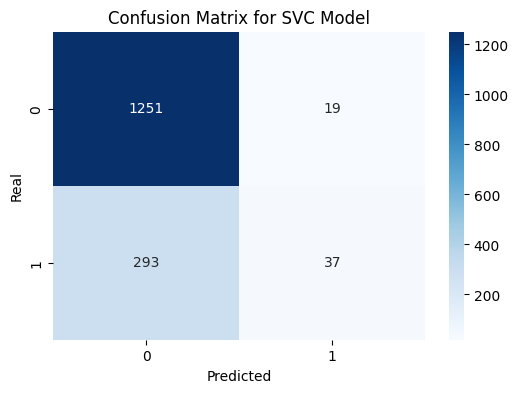

In [ ]:
# SVC model
svc = LinearSVC()
LSVC = svc.fit(X_train, y_train)
y_pred_train = LSVC.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
print('Training accuracy of SVC model:', acc_train)


y_pred_svc = LSVC.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_svc)
print('Test accuracy of SVC model:', acc_test)

cm=confusion_matrix(y_test, y_pred_svc)

print('Confusion Matrix:\n', cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for SVC Model')

Training accuracy of RandomForest model: 1.0
Test accuracy of RandomForest model: 0.8625


c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
 [[1237   33]
 [ 187  143]]


Text(0.5, 1.0, 'Confusion Matrix for RandomForest Model')

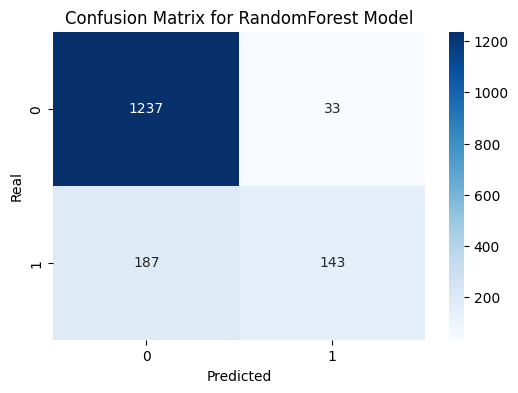

In [ ]:
# Random Forest model
RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
y_pred_train = RF.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
print('Training accuracy of RandomForest model:', acc_train)


y_pred_rf = RF.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_rf)
print('Test accuracy of RandomForest model:', acc_test)

cm=confusion_matrix(y_test, y_pred_rf)

print('Confusion Matrix:\n', cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for RandomForest Model')

Training accuracy of XGBoost model: 0.8790625
Test accuracy of XGBoost model: 0.86125
Confusion Matrix:
 [[1230   40]
 [ 182  148]]


c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix for XGBoost Model')

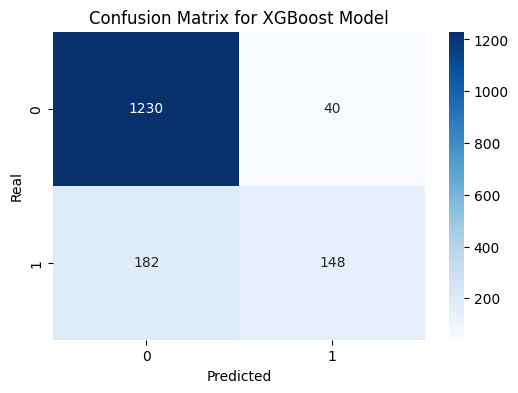

In [ ]:
# Gradient Boosting model
XGB = GradientBoostingClassifier()
XGB = XGB.fit(X_train, y_train)
y_pred_train = XGB.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
print('Training accuracy of XGBoost model:', acc_train)


y_pred_xgb = XGB.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_xgb)
print('Test accuracy of XGBoost model:', acc_test)

cm=confusion_matrix(y_test, y_pred_xgb)

print('Confusion Matrix:\n', cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for XGBoost Model')

Training accuracy of Stacking model: 0.91515625
Test accuracy of Stacking model: 0.86875
Confusion Matrix:
 [[1232   38]
 [ 172  158]]


c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix for Stacking Model')

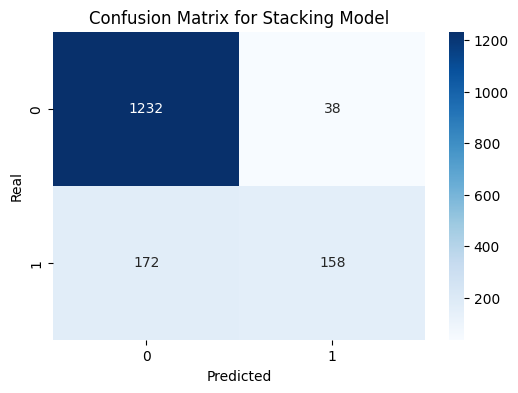

In [ ]:
# Stacking Model using the previous models

from sklearn.linear_model import LogisticRegression
Stack = StackingClassifier(
    estimators=[('rf', RF), ('xgb', XGB), ('svc', LSVC)],
    final_estimator=LogisticRegression())

stack = Stack.fit(X_train, y_train)
y_pred_train = stack.predict(X_train)

acc_train = accuracy_score(y_pred_train, y_train)
print('Training accuracy of Stacking model:', acc_train)


y_pred_stack = stack.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_stack)
print('Test accuracy of Stacking model:', acc_test)

cm=confusion_matrix(y_test, y_pred_stack)
print('Confusion Matrix:\n', cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for Stacking Model')



**Cross Validation and metrics**

Dans cette partie, nous évaluerons les métriques de performances de chaque modèle en moyennant sur 5 Folds.
- *Accuracy* : mesure la proportion globale des bonnes prédistions : **(TP+FP)/(TP+FP+TN+FN)**
- *Precision* : mesure la proportion correcte parmi les bonnes prédicrtions : **(TP)/(TP+TN)**
- *Recall* : parmi toutes les vraies observations positives, quelle proportion le modèle a réussi à identifier ? **(TP)/(TP+FN)**
- *F1-score* : équilibre précsion et recall dans le cas des **classes déséquilibrées**. **2 x (Precision x Recall)/(Precision+Recall)**
NB : it is used for binary classes
- *Courbe ROC* : pour prédire si un obseravtion est classe 1 ou classe 0, on utilise un seuil de probabilité. La courbe ROC est le TPR (Recall) en fonction de FalseNegativeRate pour tous les seuils. 
- *AUC* : La surface en dessous de la ROC entre 0 et 1. Elle mesure la cpacité d'un modèle de classifier les positifs vs les négatifs indépendament d'un seuil précis.  

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
acc_scores ={}
precision_scores = {}
recall_scores = {}
f1_scores = {}
roc_auc_scores = {}

for mode, name in zip([LSVC,RF,XGB,stack], ['LinearSVC','Random Forest', 'XGBoost', 'Stacking']):
    acc_scores[name] = cross_val_score(mode, X, y, cv=5, scoring='accuracy')
    precision_scores[name] = cross_val_score(mode, X, y, cv=5, scoring='precision')
    f1_scores[name] = cross_val_score(mode, X, y, cv=5, scoring='f1')
    recall_scores[name] = cross_val_score(mode, X, y, cv=5, scoring='recall')
    roc_auc_scores[name] = cross_val_score(mode, X, y, cv=5, scoring='roc_auc')

data_metrics = pd.DataFrame({
    'Accuracy': acc_scores,
    'Precision': precision_scores,
    'F1_Score': f1_scores,
    'Recall': recall_scores,
    'ROC_AUC': roc_auc_scores
})

print(data_metrics)
    

c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this b

                                                      Accuracy  \
LinearSVC      [0.79625, 0.79875, 0.799375, 0.79875, 0.799375]   
Random Forest     [0.8525, 0.869375, 0.859375, 0.85625, 0.875]   
XGBoost         [0.860625, 0.866875, 0.86, 0.866875, 0.873125]   
Stacking        [0.86, 0.869375, 0.859375, 0.869375, 0.870625]   

                                                       Precision  \
LinearSVC      [0.3888888888888889, 0.0, 0.5454545454545454, ...   
Random Forest  [0.7156862745098039, 0.7783783783783784, 0.770...   
XGBoost        [0.7323943661971831, 0.7914438502673797, 0.769...   
Stacking       [0.7180616740088106, 0.7938144329896907, 0.762...   

                                                        F1_Score  \
LinearSVC      [0.041176470588235294, 0.0, 0.0360360360360360...   
Random Forest  [0.5763358778625954, 0.56640625, 0.52694610778...   
XGBoost        [0.5831775700934579, 0.581532416502947, 0.5555...   
Stacking       [0.5989110707803993, 0.5925925925925926, 

In [ ]:
print('colonne',data_metrics.columns)
print('ligne',data_metrics.index)


colonne Index(['Accuracy', 'Precision', 'F1_Score', 'Recall', 'ROC_AUC'], dtype='object')
ligne Index(['LinearSVC', 'Random Forest', 'XGBoost', 'Stacking'], dtype='object')


In [ ]:
type(data_metrics['Accuracy'])

pandas.core.series.Series

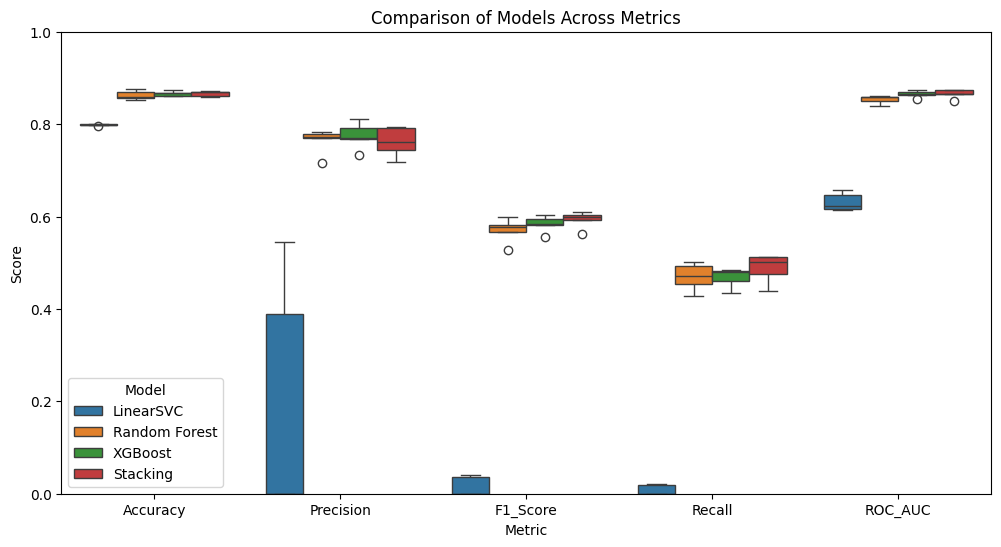

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Réinitialiser l'index pour avoir la colonne 'Model'
df_wide = data_metrics.reset_index().rename(columns={'index':'Model'})

# Transformer les listes en lignes séparées
df_long = df_wide.melt(id_vars='Model', var_name='Metric', value_name='Scores')

# "Exploser" les listes en plusieurs lignes
df_long = df_long.explode('Scores')
df_long['Scores'] = df_long['Scores'].astype(float)  # convertir en float

# Tracer le boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Metric', y='Scores', hue='Model', data=df_long)
plt.title("Comparison of Models Across Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()


c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\DataCamp\MachineLearning_PredictingChurnRate\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\U

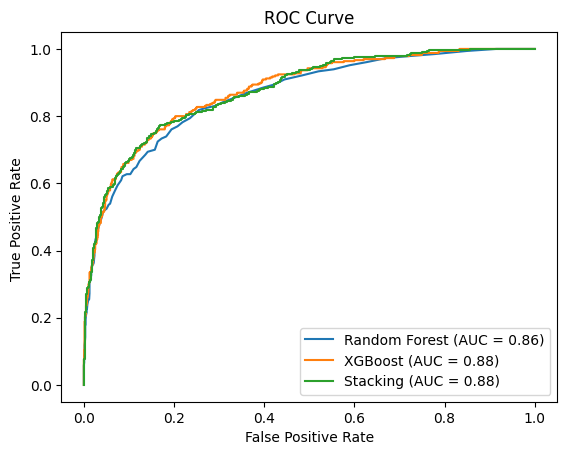

In [ ]:
# AUC Curve for best models
from sklearn.metrics import roc_curve, auc
for model, name in zip([ RF, XGB, stack], [ 'Random Forest', 'XGBoost', 'Stacking']):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('ROC Curve')
    plt.legend()

Les trois modèles RF XGB et Stacking sont généralement bons en terme de bonnes prédictions et la capacité de prédire correctement. Pourtant, le F1-score est assez faible qui environ de 60%. Cela veut dire, les modèles ont une performance moyenne : ils détectent correctement certains positifs, mais ils ratent beaucoup d’autres ou produisent pas mal de faux positifs. Ce qui est illustré par les matrices de confusion de chaque modèle.

La prochaine étape sera de résoudre le problème de déséquilibre des classes. 
